# KMeans

## Инициализация данных и импорт библиотек.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
months = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]

In [ ]:
df = pd.read_csv("data.csv")
df = df.set_index("year")
df

,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
year,,,,,,,,,,,,
1920,-9.7,-9.6,-0.6,9.3,15.5,14.7,20.8,18.4,11.3,-0.4,-3.2,-9.1
1921,-9.7,-10.9,0.6,10.4,15.7,17.1,15.5,15.6,9.1,3.1,-5.3,-9.2
1922,-10.5,-8.8,-3.5,4.7,12.2,15.4,18.2,15.7,9.8,2.4,-1.2,-6.4
1923,-7.5,-13.6,-5.2,0.5,12.4,14.7,15.6,13.4,12.3,7.1,2.6,-7.2
1924,-14.0,-11.7,-6.3,3.3,13.0,17.2,16.0,16.0,13.5,4.3,-1.5,-7.4
...,...,...,...,...,...,...,...,...,...,...,...,...
2015,-4.4,-2.2,2.0,6.1,14.2,17.9,18.3,17.6,13.8,4.4,0.8,0.2
2016,-10.1,-0.6,0.3,8.1,15.0,18.2,20.9,19.5,11.4,4.4,-2.7,-4.6
2017,-7.8,-4.6,2.4,5.3,10.9,14.4,17.9,18.8,13.0,5.0,0.0,0.0


In [ ]:
df_mean = df.mean().round(2)
df_mean

Средняя температура за 100 лет в каждом месяце. Мы живём в этом городе, поэтому нам эти данные близки.

## K = 5

In [ ]:
n_clusters = 5
labels, inertias = [], []
for i in range(10):
    kmeans_random = KMeans(n_clusters=n_clusters, init='random', n_init=1) #классический k-means
    kmeans_random.fit(df)
    labels.append(kmeans_random.labels_)
    inertias.append(kmeans_random.inertia_)

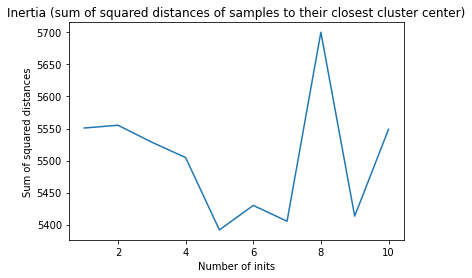

In [ ]:
x = np.linspace(1, 10, 10)
plt.plot(x, inertias)
plt.xlabel('Number of inits')
plt.ylabel('Sum of squared distances')
plt.title('Inertia (sum of squared distances of samples to their closest cluster center)')
plt.show()

Заметим, что в среднем инерция стремится к одному и тому же значению. Очевидно, лучший запуск алгоритма - девятый.

In [ ]:
best_random_index = np.argmin(inertias)
best_random_index

4

Было понятно из картинки. Выдало 8й индекс, потому что нумерация массива с 0.

In [ ]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(df)
inertia = kmeans.inertia_
print("Inertia difference between best random run and k-means++ run:", inertias[best_random_index] - kmeans.inertia_)
print("Inertia difference between random runs mean and k-means++ run:", np.mean(inertias) - kmeans.inertia_)

Inertia difference between best random run and k-means++ run: 63.41823741378175
Inertia difference between random runs mean and k-means++ run: 174.51551555484548


Нам стало интересно сравнить лучший из 10 запусков k-means с модификацией алгоритма (k-means++), в которой выбираются оптимальные, а не случайные точки. Заметим, что разница между k-means++ и лучшим запуском намного меньше, чем между k-means++ и среднем значением по запускам. По графику видно, что значения лежат в районе 5500, поэтому такие разницы кажутся не существенными. То есть 10 запусков оказалось достаточно для того, чтобы найти приемлимое разбиение. 

In [ ]:
best_inertia = inertias[best_random_index]
best_inertia_label = labels[best_random_index]

Запоминаем значения лучшего запуска, чтобы затем визуализировать.

In [ ]:
clusters = {}
for k in range(n_clusters):
    clusters['Cluster ' + str(k + 1)] = df.values[np.where(best_inertia_label == k)]

Создаем словарь вида: "Кластер":"Года в нём"

In [ ]:
cluster_means = []
for name_of_cluster in clusters:
    cluster_means.append(np.mean(clusters[name_of_cluster], axis=0))
    
grand_mean = np.mean(df, axis=0).values

means = pd.DataFrame(
    (cluster_means + [grand_mean]),
    (list(clusters.keys()) + ['Grand mean'])
)
means.columns = months
means.round(2)
# mean values for each month in each cluster

,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
Cluster 1,-15.28,-10.13,-4.68,4.36,12.28,15.96,18.57,16.92,11.36,4.35,-1.28,-8.74
Cluster 2,-10.24,-9.25,-3.16,5.46,12.42,17.03,18.75,16.90,11.30,4.65,-1.01,-3.31
Cluster 3,-6.06,-7.65,-2.38,6.06,13.11,16.28,18.98,16.97,11.02,4.53,-1.53,-8.38
Cluster 4,-6.13,-3.63,0.04,7.01,13.32,17.50,18.90,17.16,11.73,5.98,-0.68,-3.54
Cluster 5,-9.24,-15.38,-5.22,3.22,12.51,15.98,17.63,16.71,10.56,5.47,-1.30,-5.48
Grand mean,-8.67,-8.10,-2.58,5.64,12.84,16.64,18.73,16.97,11.26,4.96,-1.16,-6.00


Посмотрим на средние значения температуры в каждом месяце по каждому кластеру и средние значения в каждом месяце по всем данным. Заметим, что в основном средние значения в каждом кластере не так сильно отличаются от Grand mean, но есть отдельные кластеры с выбросами значений по конкретным месяцам. Например, 1-й кластер выделяется очень холодным февралем и самым жарким июнем. Второй кластер во многие месяца оказывается самым холодным. 4-й кластер зачастую не сильно отклоняется от grand mean, хотя отклонения 5-го кластера еще меньше.

In [ ]:
num_objects = []
for name_of_cluster in clusters:
    num_objects.append(len(clusters[name_of_cluster]))
num_objects

[16, 20, 31, 24, 9]

Посмотрим на количество элементов в каждом кластере. Второй кластер проседает на фоне остальных по количеству элементов, но это объяснимо аномально низкими показателями средней погоды в январе и марте. В то время как 5й кластер вобрал в себя довольно много элементов, в нём можно выделить очень тёплый февраль.

In [ ]:
relative_differences = 100 * np.divide(np.subtract(cluster_means, grand_mean), grand_mean)
rel_dif = pd.DataFrame(
    relative_differences,
    clusters.keys(),
    months
)
rel_dif['Number of objects'] = num_objects
rel_dif.round(2)
# relative difference in %

,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,Number of objects
Cluster 1,76.17,25.06,81.51,-22.65,-4.31,-4.09,-0.86,-0.26,0.86,-12.28,9.72,45.60,16
Cluster 2,18.05,14.25,22.33,-3.28,-3.27,2.32,0.11,-0.44,0.36,-6.13,-13.08,-44.84,20
Cluster 3,-30.16,-5.57,-7.57,7.41,2.17,-2.20,1.36,-0.01,-2.13,-8.67,31.86,39.71,31
Cluster 4,-29.34,-55.12,-101.62,24.34,3.75,5.14,0.93,1.12,4.21,20.66,-41.19,-41.05,24
Cluster 5,6.58,89.94,102.49,-42.87,-2.52,-4.00,-5.86,-1.52,-6.25,10.24,11.88,-8.72,9


Посмотрим на относительную разницу в % соотношении для удобства, возможно что-то ускользнуло от нас ранее. Ничего не пропустили, можно отметить, что опять же сильно выделяется второй кластер.

In [ ]:
for k, name_of_cluster in enumerate(clusters):
    print('____________')
    print(name_of_cluster, ':\n')
    print(', '.join(map(lambda x: str(x), df.index.values[np.where(best_inertia_label == k)])))
    print()

____________
Cluster 1 :

1924, 1926, 1927, 1933, 1940, 1941, 1942, 1945, 1950, 1954, 1963, 1967, 1968, 1969, 1987, 2010

____________
Cluster 2 :

1922, 1935, 1936, 1937, 1943, 1948, 1951, 1960, 1964, 1965, 1970, 1972, 1976, 1979, 1980, 1982, 1996, 2003, 2006, 2011

____________
Cluster 3 :

1920, 1921, 1925, 1930, 1934, 1938, 1939, 1944, 1946, 1949, 1952, 1955, 1958, 1959, 1962, 1966, 1971, 1977, 1978, 1984, 1986, 1988, 1993, 1994, 1997, 1998, 2001, 2002, 2005, 2012, 2018

____________
Cluster 4 :

1957, 1961, 1973, 1974, 1975, 1981, 1983, 1989, 1990, 1991, 1992, 1995, 1999, 2000, 2004, 2007, 2008, 2009, 2013, 2014, 2015, 2016, 2017, 2019

____________
Cluster 5 :

1923, 1928, 1929, 1931, 1932, 1947, 1953, 1956, 1985



Содержания кластеров.

Примечательно то, что в 5 кластер попали сразу 6 годов подряд (1988-1993). В целом в него попало очень много годов за последние 30 лет наблюдений. Можно сделать вывод о том, что погода изменилась и стала похожа на 5й кластер, в котором средние значения теплее чем grand mean. Вот и доказательство глобального потепления.

## K = 9

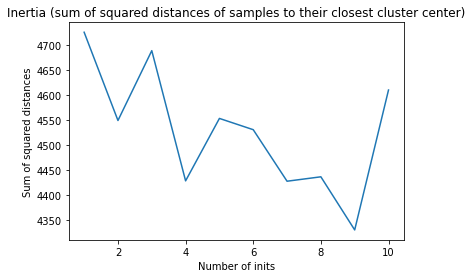

In [ ]:
n_clusters = 9
labels, inertias = [], []
for i in range(10):
    kmeans_random = KMeans(n_clusters=n_clusters, init='random', n_init=1) #классический k-means
    kmeans_random.fit(df)
    labels.append(kmeans_random.labels_)
    inertias.append(kmeans_random.inertia_)

x = np.linspace(1, 10, 10)
plt.plot(x, inertias)
plt.xlabel('Number of inits')
plt.ylabel('Sum of squared distances')
plt.title('Inertia (sum of squared distances of samples to their closest cluster center)')
plt.show()

Видно, что лучшим оказался 5й запуск.

In [ ]:
best_random_index = np.argmin(inertias)
best_random_index

8

In [ ]:
kmeans = KMeans(n_clusters = 9)
kmeans.fit(df)
inertia = kmeans.inertia_
print("Inertia difference between best random run and k-means++ run:", inertias[best_random_index] - kmeans.inertia_)
print("Inertia difference between random runs mean and k-means++ run:", np.mean(inertias) - kmeans.inertia_)

Inertia difference between best random run and k-means++ run: 24.41569623432042
Inertia difference between random runs mean and k-means++ run: 221.77645792677686


Опять же разницы сильно отличаются друг от друга. Лучший запуск оказался очень близок к результату k-means++.

In [ ]:
best_inertia = inertias[best_random_index]
best_inertia_label = labels[best_random_index]
clusters = {}
for k in range(n_clusters):
    clusters['Cluster ' + str(k + 1)] = df.values[np.where(best_inertia_label == k)]

In [ ]:
cluster_means = []
for name_of_cluster in clusters:
    cluster_means.append(np.mean(clusters[name_of_cluster], axis=0))
    
grand_mean = np.mean(df, axis=0).values

means = pd.DataFrame(
    (cluster_means + [grand_mean]),
    (list(clusters.keys()) + ['Grand mean'])
)
means.columns = months
means.round(2)
# mean values for each month in each cluster

,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
Cluster 1,-5.99,-3.61,-0.58,6.69,13.26,17.51,19.67,16.99,10.78,4.15,-2.87,-6.82
Cluster 2,-5.28,-8.71,-2.91,5.82,14.82,17.56,19.54,17.65,11.90,5.97,0.18,-3.27
Cluster 3,-9.88,-9.23,-1.13,7.12,15.00,16.47,20.30,18.09,11.19,5.19,1.05,-8.85
Cluster 4,-12.07,-8.43,-2.59,5.84,12.25,16.49,17.00,16.37,10.86,4.05,-1.79,-5.74
Cluster 5,-15.01,-13.11,-6.58,2.78,13.37,15.44,18.48,16.86,11.41,4.88,-0.52,-7.68
Cluster 6,-6.41,-2.97,0.89,7.31,11.56,16.81,18.64,17.08,11.81,6.86,0.03,-1.52
Cluster 7,-5.31,-9.28,-4.14,4.28,12.04,14.74,17.23,15.99,11.45,5.38,-0.44,-8.88
Cluster 8,-13.18,-9.70,-4.88,3.28,8.55,14.68,19.38,16.85,10.80,3.28,-3.75,-12.22
Cluster 9,-10.72,-12.12,-4.02,5.34,11.18,18.39,18.79,16.99,11.21,4.63,-2.88,-2.08
Grand mean,-8.67,-8.10,-2.58,5.64,12.84,16.64,18.73,16.97,11.26,4.96,-1.16,-6.00


Снова можем выделить кластер с очень холодными январем, мартом и декабрем - кластер 7. Во 2 кластере холодный февраль. Кластер 6 выделяется жаркими июлем и августом. Кластер 4 единственный с положительной средней температурой в марте и с самым теплым февралем.

In [ ]:
num_objects = []
for name_of_cluster in clusters:
    num_objects.append(len(clusters[name_of_cluster]))
num_objects

[18, 14, 10, 15, 9, 9, 12, 4, 9]

Кластеры 2, 5 и 9 явно выделяются по количеству элементов. Кластер 5 выделяется темплым январем и в целом почти все средние температуры выше grand mean. Кластер 9 почти в каждом месяце близок к grand mean.

В кластере 6 мало элементов. Выше уже было упомянуто то, что он выделяется на фоне остальных жаркими июлем и августом.

In [ ]:
relative_differences = 100 * np.divide(np.subtract(cluster_means, grand_mean), grand_mean)
rel_dif = pd.DataFrame(
    relative_differences,
    clusters.keys(),
    months
)
rel_dif['Number of objects'] = num_objects
rel_dif.round(2)
# relative difference in %

,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,Number of objects
Cluster 1,-30.89,-55.46,-77.60,18.60,3.28,5.18,5.00,0.12,-4.27,-16.31,147.18,13.59,18
Cluster 2,-39.14,7.55,12.72,3.22,15.48,5.49,4.34,4.01,5.69,20.42,-115.37,-45.49,14
Cluster 3,13.90,14.01,-56.18,26.24,16.87,-1.05,8.38,6.61,-0.61,4.66,-190.36,47.48,10
Cluster 4,39.19,4.17,0.56,3.55,-4.53,-0.91,-9.24,-3.55,-3.54,-18.26,54.33,-4.35,15
Cluster 5,73.06,61.95,155.05,-50.75,4.14,-7.21,-1.35,-0.67,1.35,-1.64,-55.06,27.94,9
Cluster 6,-26.09,-63.36,-134.47,29.63,-9.97,1.00,-0.46,0.64,4.90,38.24,-102.87,-74.63,9
Cluster 7,-38.80,14.67,60.59,-24.20,-6.18,-11.43,-8.04,-5.76,1.70,8.39,-61.99,48.03,12
Cluster 8,51.89,19.81,89.03,-41.93,-33.39,-11.83,3.44,-0.70,-4.08,-33.96,222.72,103.72,4
Cluster 9,23.61,49.73,55.96,-5.24,-12.91,10.48,0.31,0.12,-0.43,-6.57,147.66,-65.38,9


Сильно выделяется кластер 4 теплой погодой в ноябре. В 6м кластере среднее значение температуры в ноябре тоже довольно велико.

In [ ]:
for k, name_of_cluster in enumerate(clusters):
    print('____________')
    print(name_of_cluster, ':\n')
    print(', '.join(map(lambda x: str(x), df.index.values[np.where(best_inertia_label == k)])))
    print()

____________
Cluster 1 :

1925, 1939, 1957, 1959, 1961, 1973, 1975, 1988, 1989, 1992, 1993, 1995, 1997, 1998, 2001, 2002, 2014, 2016

____________
Cluster 2 :

1932, 1936, 1948, 1949, 1981, 1983, 1991, 2003, 2005, 2007, 2009, 2011, 2013, 2018

____________
Cluster 3 :

1920, 1934, 1938, 1966, 1967, 1977, 1986, 1996, 2010, 2012

____________
Cluster 4 :

1921, 1922, 1935, 1937, 1943, 1946, 1950, 1968, 1970, 1976, 1979, 1980, 1982, 1985, 1987

____________
Cluster 5 :

1924, 1926, 1929, 1931, 1940, 1942, 1954, 1963, 1969

____________
Cluster 6 :

1974, 1990, 1999, 2000, 2004, 2008, 2015, 2017, 2019

____________
Cluster 7 :

1923, 1928, 1930, 1944, 1952, 1955, 1958, 1962, 1971, 1978, 1984, 1994

____________
Cluster 8 :

1927, 1933, 1941, 1945

____________
Cluster 9 :

1947, 1951, 1953, 1956, 1960, 1964, 1965, 1972, 2006



Подтвердим ранее сказанное тем, что почти те же года, что и в 5й кластер при разбиении на 5 кластеров, попали в 5й кластер при разбиении на 9 кластеров. Причем 5й кластер опять оказался теплее grand mean.

## Проверим разное количество кластеров (2, 4, 8, 16, 25, 38, 50)

In [ ]:
n_clusters = [2, 4, 8, 16, 25, 38, 50]
mean_inertia_for_each_cluster = []
for n_c in n_clusters:
    inertias = []
    # run k-means 30 times
    for i in range(30):
        kmeans_random = KMeans(n_clusters=n_c, init='random', n_init=1)
        kmeans_random.fit(df)
        inertias.append(kmeans_random.inertia_)
    # add mean inertias value for each cluster
    mean_inertia_for_each_cluster.append(np.mean(inertias))
print('Rounded mean intertias:', *list(np.around(mean_inertia_for_each_cluster)))

Rounded mean intertias: 6936.0 5818.0 4734.0 3661.0 2938.0 2153.0 1568.0


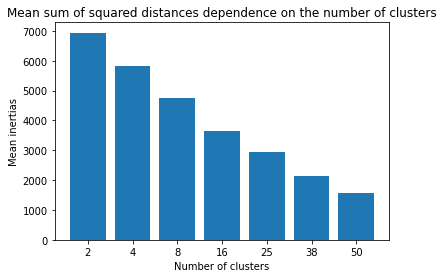

In [ ]:
plt.bar(np.arange(len(n_clusters)), mean_inertia_for_each_cluster, align='center', tick_label = n_clusters)
plt.ylabel('Mean inertias')
plt.xlabel('Number of clusters')
plt.title('Mean sum of squared distances dependence on the number of clusters')
plt.show()

Нас заинтересовали изменения среднего значения инерции при изменении количества кластеров. Очевидно с ростом количества кластеров уменьшается средняя инерция для 30 запусков. Заметим, что с увеличением количества кластеров с 2 до 4, 4 до 8 и 8 до 16, то есть в 2 раза, среднее значение инерции изменяется примерно на 1100 для всех. То есть изначально в % соотношении улучшения хуже, чем в последующих увеличениях количества кластеров. Давайте посмотрим на эти значения.

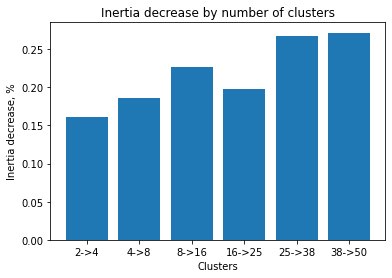

In [ ]:
inertia_decrease_in_percentages = []
for i in range(1, len(mean_inertia_for_each_cluster)):
  inertia_decrease_in_percentages.append((mean_inertia_for_each_cluster[i - 1] - mean_inertia_for_each_cluster[i]) / mean_inertia_for_each_cluster[i - 1])

clusters_ = []
for i in range(1, len(n_clusters)):
  clusters_.append(str(n_clusters[i - 1]) + '->' + str(n_clusters[i]))

plt.bar(np.arange(len(inertia_decrease_in_percentages)), inertia_decrease_in_percentages, align='center', tick_label = clusters_)
plt.ylabel('Inertia decrease, %')
plt.xlabel('Clusters')
plt.title('Inertia decrease by number of clusters')
plt.show()

Итак, вышесказанное подтвердилось. Со временем процентное убывание инерции только растёт. Это логично в силу того, что в целом разброс данных небольшой, так еще и аномальные года могут забирать себе целые кластеры при их достаточном количестве.

## Иллюстрация недостатка работы метода k-means

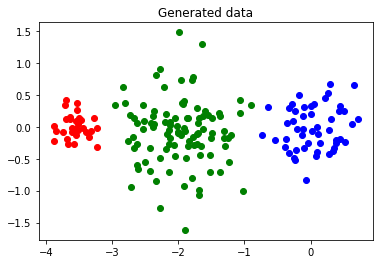

In [ ]:
np.random.seed(123)
X1 = np.random.normal(loc=[0, 0], scale = 0.3, size=(50,2))
X2 = np.random.normal(loc=[-2, 0], scale = 0.5, size=(100,2))
X3 = np.random.normal(loc=[-3.5, 0], scale = 0.2, size=(30,2))
X = np.vstack((X1,X2,X3))
y = np.array([1]*50 + [2]*100 + [3]*30)
plt.plot(X1[:, 0], X1[:, 1], '.', label = "X1", markersize = 12, c = 'b')
plt.plot(X2[:, 0], X2[:, 1], '.', label = "X2", markersize = 12, c = 'g')
plt.plot(X3[:, 0], X3[:, 1], '.', label = "X3", markersize = 12, c = 'r')
plt.title('Generated data')
plt.show()

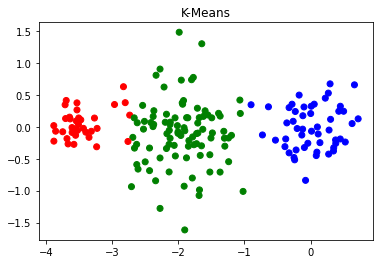

In [ ]:
k_means = KMeans(n_clusters=3)
clusters = k_means.fit_predict(X)
color_clusters = []
for c in clusters:
  if c == 0:
    color_clusters.append('b')
  elif c == 1:
    color_clusters.append('g')
  else:
    color_clusters.append('r')
plt.scatter(X[:, 0], X[:, 1], c=color_clusters)
plt.title('K-Means')
plt.show()

# Bootstrap

## Подготовка данных

Распределение объектов (годов) по средней температуре января от -20 до -2.5 градусов.

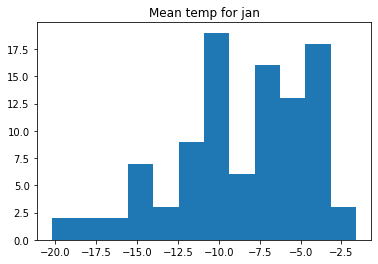

In [ ]:
feature = df.iloc[:, 0]

plt.hist(feature, bins=12)
plt.title('Mean temp for jan')
plt.show()

In [ ]:
n_bootstrap = 5000

In [ ]:
np.random.seed(123)
label = best_inertia_label

Среднее значение температуры января для 5000 выбранных с помощью бутстрапа объектов:

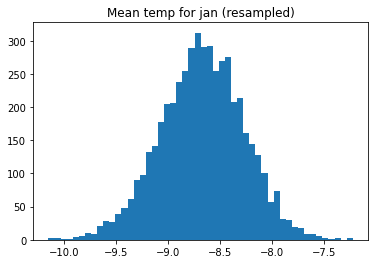

In [ ]:
r = np.random.choice(feature, size=(len(feature), n_bootstrap))

rm = np.mean(r, axis=0)

plt.hist(rm, bins=50)
plt.title('Mean temp for jan (resampled)')
plt.show()

Возьмем деление на 9 кластеров из k-means 

In [ ]:
best_inertia_label

array([2, 3, 3, 6, 4, 0, 4, 7, 6, 4, 6, 4, 1, 7, 2, 3, 1, 3, 2, 0, 4, 7,
       4, 3, 6, 7, 3, 8, 1, 1, 3, 8, 6, 8, 4, 6, 8, 0, 6, 0, 8, 0, 6, 4,
       8, 8, 2, 2, 3, 4, 3, 6, 8, 0, 5, 0, 3, 2, 6, 3, 3, 1, 3, 1, 6, 3,
       2, 3, 0, 0, 5, 1, 0, 0, 6, 0, 2, 0, 0, 5, 5, 0, 0, 1, 5, 1, 8, 1,
       5, 1, 2, 1, 2, 1, 0, 5, 0, 5, 1, 5], dtype=int32)

In [ ]:
feature_1 = feature.values[np.where(label == 7)]

r1 = r * np.isin(r, feature_1)
rm1 = np.sum(r1, axis=0) / np.count_nonzero(r1, axis=0)
rm1 = np.nan_to_num(rm1, nan=np.mean(rm1[~np.isnan(rm1)])) # change nan to mean

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


In [ ]:
r1

array([[ -0. ,  -0. ,  -0. , ...,  -0. ,  -0. , -14.2],
       [ -0. ,  -0. ,  -0. , ...,  -0. ,  -0. ,  -0. ],
       [ -0. ,  -0. ,  -0. , ...,  -0. ,  -0. ,  -0. ],
       ...,
       [ -0. ,  -0. ,  -0. , ...,  -0. ,  -0. ,  -0. ],
       [ -0. ,  -0. ,  -0. , ...,  -0. ,  -0. ,  -0. ],
       [ -0. ,  -0. ,  -0. , ...,  -0. ,  -0. ,  -0. ]])

Среднее значение температуры января для бутсрапированной выборки 7 кластера:

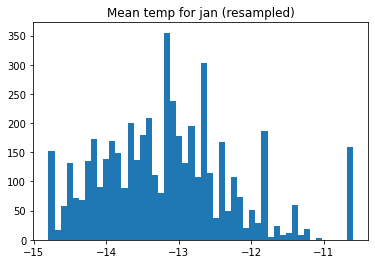

In [ ]:
plt.hist(rm1, bins=50)
plt.title('Mean temp for jan (resampled)')
plt.show()

In [ ]:
feature_2 = feature.values[np.where(label == 5)]

r2 = r * np.isin(r, feature_2)
rm2 = np.sum(r2, axis=0) / np.count_nonzero(r2, axis=0)
rm2 = np.nan_to_num(rm2, nan=np.mean(rm2[~np.isnan(rm2)]))

Среднее значение температуры января для бутсрапированной выборки 5 кластера:


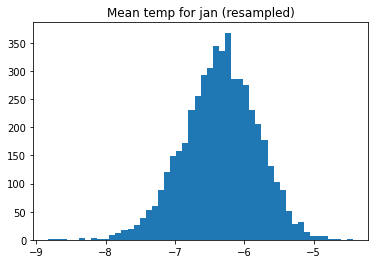

In [ ]:
plt.hist(rm2, bins=50)
plt.title('Mean temp for jan (resampled)')
plt.show()

## Алгоритм и его применение

In [ ]:
def bootstrap(x, n_bootstrap=n_bootstrap):
    
    # pivotal
    mean_p = np.mean(x)
    std_p = np.std(x)
    lbord_p = mean_p - 1.96 * std_p
    rbord_p = mean_p + 1.96 * std_p
    confint_p = np.array([lbord_p, rbord_p])
    
    # non-pivotal
    x_sorted = np.sort(x)
    lbord_np = x_sorted[int(n_bootstrap * 0.025) + 1]
    rbord_np = x_sorted[int(n_bootstrap * 0.975)]
    confint_np = np.array([lbord_np, rbord_np])
    
    return confint_p, confint_np

In [ ]:
rm_confint_p, rm_confint_np = bootstrap(rm)
print('Feature mean: %.2f' % np.mean(feature))
print('Confidence interval (pivotal): %.2f, %.2f' % (rm_confint_p[0], rm_confint_p[1]))
print('Confidence interval (nonpivotal): %.2f, %.2f' % (rm_confint_np[0], rm_confint_np[1]))

Feature mean: -8.67
Confidence interval (pivotal): -9.46, -7.89
Confidence interval (nonpivotal): -9.48, -7.91


In [ ]:
rm1_rm2_confint_p, rm1_rm2_confint_np = bootstrap(rm1 - rm2)
print('Confidence interval (pivotal): %.2f, %.2f' % (rm1_rm2_confint_p[0], rm1_rm2_confint_p[1]))
print('Confidence interval (nonpivotal): %.2f, %.2f' % (rm1_rm2_confint_np[0], rm1_rm2_confint_np[1]))

Confidence interval (pivotal): -8.92, -4.72
Confidence interval (nonpivotal): -8.69, -4.35


In [ ]:
rm1_rm_confint_p, rm1_rm_confint_np = bootstrap(rm1 - rm)
print('Confidence interval (pivotal): %.2f, %.2f' % (rm1_rm_confint_p[0], rm1_rm_confint_p[1]))
print('Confidence interval (nonpivotal): %.2f, %.2f' % (rm1_rm_confint_np[0], rm1_rm_confint_np[1]))

Confidence interval (pivotal): -6.44, -2.56
Confidence interval (nonpivotal): -6.32, -2.25


Средняя температура января для кластера 7:

In [ ]:
np.mean(rm1)

-13.168518007591649

Средняя температура января для кластера 5:

In [ ]:
np.mean(rm2)

-6.348353561703455

Видно, что в кластере №5 собрались года с гораздо более холодной средней температурой января.

In [ ]:
np.mean(rm)

-8.6722924

Получается, что средняя температура января по всем данным ниже температуры в кластере 5, но выше, чем в кластере 7, что может говорить о том, что кластер 5 содержит года с более высокой среднемесячной температурой, а кластер 7 – с менее.


# Contingency Table

In [ ]:
import seaborn as sb

## Деление данных

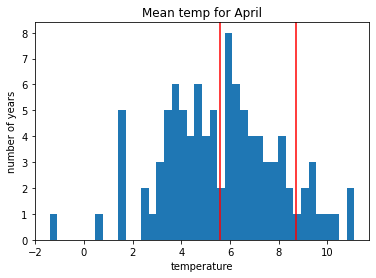

In [ ]:
apr = df.iloc[:, 3]
plt.hist(apr, 40)
plt.axvline(5.6, c='r')
plt.axvline(8.7, c='r')
plt.xlabel("temperature")
plt.ylabel("number of years")
plt.title('Mean temp for April')
plt.show()

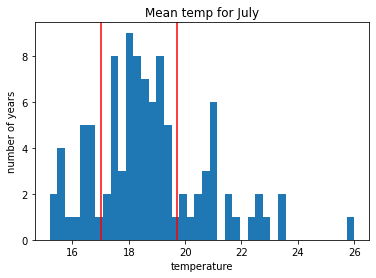

In [ ]:
jul = df.iloc[:, 6]
plt.hist(jul, 40)
plt.axvline(17, c='r')
plt.axvline(19.7, c='r')
plt.xlabel("temperature")
plt.ylabel("number of years")
plt.title('Mean temp for July')
plt.show()

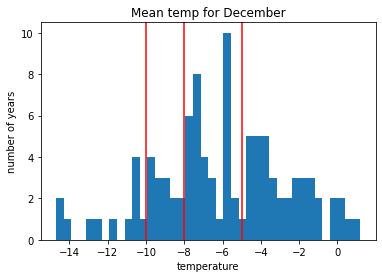

In [ ]:
dec = df.iloc[:, 11]
plt.hist(dec, 40)
plt.axvline(-10, c='r')
plt.axvline(-8, c='r')
plt.axvline(-5, c='r')
plt.xlabel("temperature")
plt.ylabel("number of years")
plt.title('Mean temp for December')
plt.show()

Нашли значения по которым стоит разделить наши данные.

In [ ]:
apr_cut = pd.cut(apr, [-2, 5.6, 8.7, 12], labels=['Apr_1', 'Apr_2', 'Apr_3'])
jul_cut = pd.cut(jul, [14, 17, 19.7, 26], labels=['Jul_1', 'Jul_2', 'Jul_3'])
dec_cut = pd.cut(dec, [-16, -10, -8, -5, 2], labels=['Dec_1', 'Dec_2', 'Dec_3', 'Dec_4'])

In [ ]:
apr_cut

year
1920    Apr_3
1921    Apr_3
1922    Apr_1
1923    Apr_1
1924    Apr_1
        ...  
2015    Apr_2
2016    Apr_2
2017    Apr_1
2018    Apr_2
2019    Apr_2
Name: apr, Length: 100, dtype: category
Categories (3, object): ['Apr_1' < 'Apr_2' < 'Apr_3']

## Связь X1 и Х2

In [ ]:
condition = apr_cut
target = jul_cut

В качестве X1 (из условия задания) у нас выступает апрель, а в качестве X2 июль.

In [ ]:
crosstab = pd.crosstab(target, condition, margins=True) # таблица сопряженности
crosstab

apr,Apr_1,Apr_2,Apr_3,All
jul,,,,
Jul_1,11,6,2,19
Jul_2,25,27,5,57
Jul_3,12,9,3,24
All,48,42,10,100


Сразу можно выделить любой апрель и июль 2. Там находятся наибольшие значения по столбцам. Это логично, в силу регрессии температуры к среднему. Как мы и отмечали ранее, данные очень слабо коррелируют друг с другом, то есть средняя температура в одном месяце не влияет на среднюю температуру в другом месяце.

In [ ]:
relfreq = pd.crosstab(target, condition, margins=True, normalize=True)
relfreq.round(2)

apr,Apr_1,Apr_2,Apr_3,All
jul,,,,
Jul_1,0.11,0.06,0.02,0.19
Jul_2,0.25,0.27,0.05,0.57
Jul_3,0.12,0.09,0.03,0.24
All,0.48,0.42,0.10,1.00


In [ ]:
condfreq = np.divide(crosstab, crosstab[-1:]) # матрица условных вероятностей
condfreq.round(2)

apr,Apr_1,Apr_2,Apr_3,All
jul,,,,
Jul_1,0.23,0.14,0.2,0.19
Jul_2,0.52,0.64,0.5,0.57
Jul_3,0.25,0.21,0.3,0.24
All,1.00,1.00,1.0,1.00


Apr_2 -> Jul_2: При теплом апреле скорее всего будет теплый июль.

Apr_2 not -> Jul_1: При теплом апреле маловероятен холодный июль.

In [ ]:
relfreq_indep = np.dot(relfreq.iloc[:,-1].values[:, None], relfreq.iloc[-1,:].values[None, :])
relfreq_indep.round(2)

array([[0.09, 0.08, 0.02, 0.19],
       [0.27, 0.24, 0.06, 0.57],
       [0.12, 0.1 , 0.02, 0.24],
       [0.48, 0.42, 0.1 , 1.  ]])

In [ ]:
quetelet = relfreq / relfreq_indep - 1 # матрица Кетле
quetelet = quetelet.iloc[:-1, :-1]
quetelet.round(2)

apr,Apr_1,Apr_2,Apr_3
jul,,,
Jul_1,0.21,-0.25,0.05
Jul_2,-0.09,0.13,-0.12
Jul_3,0.04,-0.11,0.25


При жарком апреле на 25% чаще жаркий июль.

In [ ]:
m = relfreq.iloc[:-1, :-1] * quetelet
m.round(2)

apr,Apr_1,Apr_2,Apr_3
jul,,,
Jul_1,0.02,-0.01,0.00
Jul_2,-0.02,0.03,-0.01
Jul_3,0.01,-0.01,0.01


In [ ]:
Q = np.sum(m.values)
Q.round(4)

0.0185

В среднем, зная температру в апреле, можно с 1.85% вероятностью предсказать температуру в июле. Можно сделать вывод о том, что эти данные катастрофически слабо коррелируют.

In [ ]:
h = (relfreq - relfreq_indep)**2 / relfreq_indep
h = h.iloc[:-1, :-1]
h.round(4)

apr,Apr_1,Apr_2,Apr_3
jul,,,
Jul_1,0.0039,0.0049,0.0001
Jul_2,0.0020,0.0039,0.0009
Jul_3,0.0002,0.0012,0.0015


In [ ]:
hi2 = np.sum(h.values)
hi2.round(4)

0.0185

Коэффициент хи-квадрат равен Q.

## Связь X1 и X3

In [ ]:
condition = apr_cut
target = dec_cut

In [ ]:
crosstab = pd.crosstab(target, condition, margins=True) # таблица сопряженности
crosstab

apr,Apr_1,Apr_2,Apr_3,All
dec,,,,
Dec_1,7,4,1,12
Dec_2,4,7,3,14
Dec_3,22,12,1,35
Dec_4,15,19,5,39
All,48,42,10,100


Большая часть значений оказалась в декабре 3-4 и апреле 1-2. В апреле 3 опять же значения небольшие.

In [ ]:
condfreq = np.divide(crosstab, crosstab[-1:]) # матрица условных вероятностей
condfreq.round(2)

apr,Apr_1,Apr_2,Apr_3,All
dec,,,,
Dec_1,0.15,0.10,0.1,0.12
Dec_2,0.08,0.17,0.3,0.14
Dec_3,0.46,0.29,0.1,0.35
Dec_4,0.31,0.45,0.5,0.39
All,1.00,1.00,1.0,1.00


Apr_3 -> Dec_4: При жарком апреле 50% вероятность того, что будет очень теплый декабрь.

Apr_1 not -> Dec_2: При холодном апреле маловероятен холодный (но не морозный!) декабрь.


In [ ]:
relfreq = pd.crosstab(target, condition, margins=True, normalize=True)
relfreq_indep = np.dot(relfreq.iloc[:,-1].values[:, None], relfreq.iloc[-1,:].values[None, :])
quetelet = relfreq / relfreq_indep - 1 # матрица Кетле
quetelet = quetelet.iloc[:-1, :-1]
quetelet.round(2)

apr,Apr_1,Apr_2,Apr_3
dec,,,
Dec_1,0.22,-0.21,-0.17
Dec_2,-0.40,0.19,1.14
Dec_3,0.31,-0.18,-0.71
Dec_4,-0.20,0.16,0.28


При жарком апреле на 114% чаще холодный декабрь.

In [ ]:
m = relfreq.iloc[:-1, :-1] * quetelet
Q = np.sum(m.values)
Q.round(4)

0.0902

В среднем, зная температру в апреле, можно с 9% вероятностью предсказать температуру в декабре. Можно сделать вывод о том, что данные апреля и декабря коррелируют намного сильнее, чем данные апреля и июля, тем не менее это значение всё ещё мало.

In [ ]:
h = (relfreq - relfreq_indep)**2 / relfreq_indep
h = h.iloc[:-1, :-1]
h.round(4)

apr,Apr_1,Apr_2,Apr_3
dec,,,
Dec_1,0.0027,0.0021,0.0003
Dec_2,0.0110,0.0021,0.0183
Dec_3,0.0161,0.0050,0.0179
Dec_4,0.0074,0.0042,0.0031


In [ ]:
hi2 = np.sum(h.values)
hi2.round(4)

0.0902

Коэффициент хи-квадрат равен Q.

# PCA & SVD



## Подготовка данных

Можем взять любые признаки, так как они все идентичны. Выберем месяцы с апреля по сентябрь, включая границы.

In [ ]:
df_6_features = df.copy()
df_6_features = df_6_features.iloc[:, 3:9]

In [ ]:
mean = np.mean(df_6_features.values, axis=0)
std = np.std(df_6_features.values, axis=0)
rng = np.ptp(df_6_features.values, axis=0) # range = max - min

In [ ]:
Xr = (df_6_features - df_6_features.mean()) / (df_6_features.max() - df_6_features.min())  # range normalization
Xr  # стандартизация по размаху

,apr,may,jun,jul,aug,sep
year,,,,,,
1920,0.2928,0.271939,-0.211304,0.191667,0.164483,0.005125
1921,0.3808,0.292347,0.049565,-0.299074,-0.157356,-0.269875
1922,-0.0752,-0.064796,-0.135217,-0.049074,-0.145862,-0.182375
1923,-0.4112,-0.044388,-0.211304,-0.289815,-0.410230,0.130125
1924,-0.1872,0.016837,0.060435,-0.252778,-0.111379,0.280125
...,...,...,...,...,...,...
2015,0.0368,0.139286,0.136522,-0.039815,0.072529,0.317625
2016,0.1968,0.220918,0.169130,0.200926,0.290920,0.017625
2017,-0.0272,-0.197449,-0.243913,-0.076852,0.210460,0.217625


In [ ]:
Xz = (df_6_features - df_6_features.mean()) / df_6_features.std()  # Z-scoring
Xz  # стандартизация по Z-scoring

,apr,may,jun,jul,aug,sep
year,,,,,,
1920,1.538440,1.202280,-0.937539,1.039300,0.892872,0.025214
1921,2.000813,1.292508,0.219917,-1.621710,-0.854187,-1.327752
1922,-0.395119,-0.286472,-0.599948,-0.266101,-0.791792,-0.897263
1923,-2.160542,-0.196245,-0.937539,-1.571502,-2.226877,0.640199
1924,-0.983593,0.074438,0.268144,-1.370671,-0.604607,1.378181
...,...,...,...,...,...,...
2015,0.193356,0.615802,0.605735,-0.215893,0.393712,1.562676
2016,1.034034,0.976712,0.750417,1.089508,1.579217,0.086713
2017,-0.142915,-0.872950,-1.082221,-0.416724,1.142452,1.070689


## Z-scoring

In [ ]:
u_z, s_z, vh_z = np.linalg.svd(Xz)  # SVD для матрицы, стандртизованной Z-scoring-ом

data_scatter = np.sum((Xz**2).values)  # разброс данных (насколько данные далеки от 0 в сумме)
contributions = s_z**2 / data_scatter  # вклад каждой компоненты в разброс данных (в процентах)
contributions.round(2)

array([0.32, 0.19, 0.16, 0.14, 0.12, 0.07])

Заметим, что у нас не такая большая амплитуда вкладов в разброс данных. Апрель покрывает треть, в то время как еще одну треть покрыли май и июнь. Оставшееся распределено между тремя последними.


---


Можно заметить, что первая компонента вносит довольно большой вклад: треть от общего количества данных.
А вместе первая и вторая компоненты покрывают больше 50% данных.

In [ ]:
s_z

array([13.78546692, 10.54194425,  9.78590795,  9.14674663,  8.48156395,
        6.43928709])

Разница в сингулярных числах не особо большая, поэтому мы не можем игнорировать ни одно из них. Кроме того сингулярные числа довольно большие, это значит, что данные не коррелируют.

In [ ]:
print(vh_z.T)

[[-0.30780928  0.64447563 -0.11851161  0.07256951  0.66651509  0.1623296 ]
 [-0.34875881  0.33578203 -0.52397463 -0.47527903 -0.48503159 -0.17298122]
 [-0.33538028  0.38323458  0.46148023  0.51045179 -0.51342396  0.05934741]
 [-0.54409684 -0.25726687  0.33847863 -0.15488999  0.23667307 -0.66573234]
 [-0.54495635 -0.3908613   0.09438432 -0.23270244 -0.00161073  0.69798897]
 [-0.27950313 -0.32569011 -0.61234418  0.65585146  0.02968299 -0.0990774 ]]


Первый столбец вносит вклад в первый столбец матрицы Xz, второй во второй и тд. Причем судя по сигнулярным числам вклад каждого важен.

In [ ]:
uz0 = u_z[:, 0]
uz1 = -u_z[:, 1]
# данные понадобятся в последствии

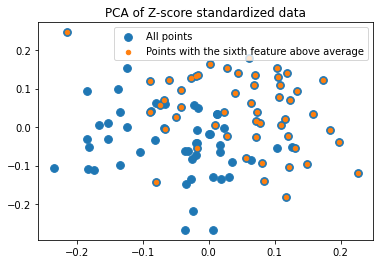

In [ ]:
plt.scatter(-u_z[:, 2], u_z[:, 3], s = 60)
plt.scatter(-u_z[:, 2][Xz.iloc[:, 5].values > 0], u_z[:, 3][Xz.iloc[:, 5].values > 0], s = 20)
plt.title('PCA of Z-score standardized data')
plt.legend(["All points", "Points with the sixth feature above average"])
plt.show()

In [ ]:
Xz.corr()

,apr,may,jun,jul,aug,sep
apr,1.000000,0.233245,0.209197,0.156427,0.060810,0.047585
may,0.233245,1.000000,0.106711,0.122759,0.213130,0.108016
jun,0.209197,0.106711,1.000000,0.219045,0.142391,0.035862
jul,0.156427,0.122759,0.219045,1.000000,0.548519,0.132375
aug,0.060810,0.213130,0.142391,0.548519,1.000000,0.221406
sep,0.047585,0.108016,0.035862,0.132375,0.221406,1.000000


Заметим, что данные очень слабо коррелируют друг с другом, что в целом логично, ведь погода меняется со временем года: не бывает месяцев с одинаковой погодой.

## Стандартизация по размаху

In [ ]:
u_r, s_r, vh_r = np.linalg.svd(Xr)
data_scatter = np.sum((Xr**2).values)
contributions = s_r**2 / data_scatter
contributions.round(2)

array([0.31, 0.19, 0.18, 0.14, 0.12, 0.06])

Вклад стандартизации по размаху идентичен вкладу стандартизации по z-scoring ([0.32, 0.19, 0.16, 0.14, 0.12, 0.07]).

In [ ]:
print(vh_r)

[[-0.32018478 -0.50538607 -0.47380214 -0.41536322 -0.41802891 -0.26514785]
 [ 0.12278875 -0.45193943  0.7707429   0.00711226 -0.17894916 -0.39313569]
 [-0.3332814  -0.63712741 -0.01957685  0.39036598  0.39531434  0.417073  ]
 [ 0.14047593 -0.068368    0.24830978 -0.42628689 -0.37168678  0.77075483]
 [-0.85509696  0.34315645  0.34323079 -0.17907902  0.03353948 -0.00716046]
 [ 0.14284202 -0.10942489  0.04023096 -0.67915198  0.70546413 -0.08412358]]


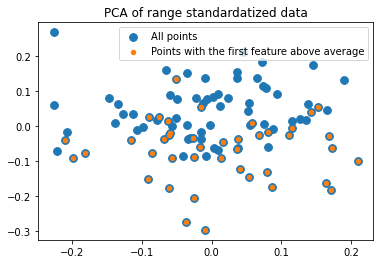

In [ ]:
plt.scatter(u_r[:, 3], u_r[:, 4], s = 60)
plt.scatter(u_r[:, 3][Xr.iloc[:, 0].values > 0.03], u_r[:, 4][Xr.iloc[:, 0].values > 0.03], s = 20)
plt.title("PCA of range standardatized data")
plt.legend(["All points", "Points with the first feature above average"])
plt.show()

## МГК

In [ ]:
N = Xz.shape[0]

cov = np.dot(Xz.T, Xz) / N

eigw, eigv = np.linalg.eig(cov)
pca0 = np.dot(Xz, eigv[:, np.argmax(eigw)]) / np.sqrt(N * eigw[np.argmax(eigw)])

cov = cov - eigw[np.argmax(eigw)] * eigv[:, np.argmax(eigw)][:, None] * eigv[:, np.argmax(eigw)]

eigw, eigv = np.linalg.eig(cov)
pca1 = np.dot(Xz, eigv[:, np.argmax(eigw)]) / np.sqrt(N * eigw[np.argmax(eigw)])

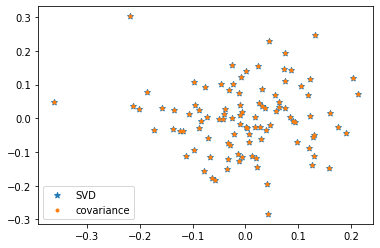

In [ ]:
plt.scatter(uz0, uz1, marker='*', label='SVD')
plt.scatter(pca0, pca1, marker='.', label='covariance')
plt.legend()
plt.show()

Первые два вектора идеально совпали!

# Correlation

## Выбор признаков

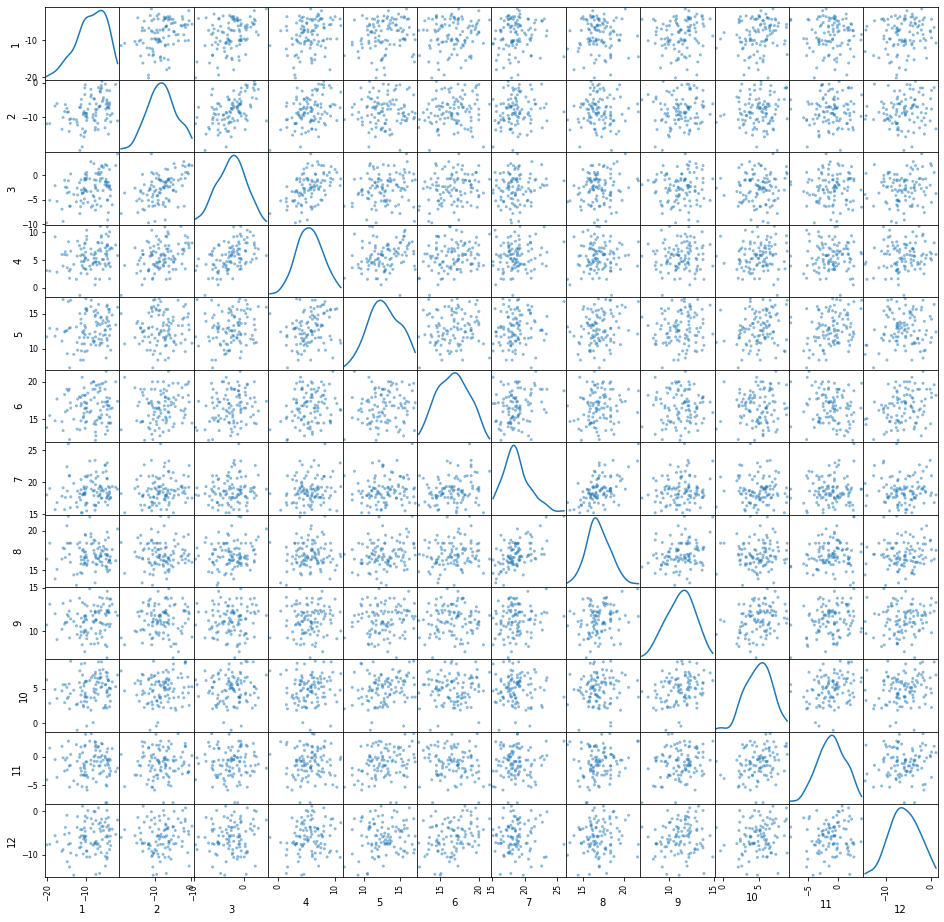

In [ ]:
from pandas.plotting import scatter_matrix
axes = scatter_matrix(df.set_axis([i for i in range(1, 13)], axis=1), alpha=0.5, diagonal='kde', figsize=(16, 16))

Более ли менее линейные признаки Июля и Августа. Но в целом месяца очевидно плохо коррелируют друг с другом. Температура одного месяца почти никак не повлияет на температуру другого месяца. Логично, что прогнозировать погоду можно на непродолжительный срок вперед, зная направление движения циклонов и масс воздуха, но никак не по температуре прошедших месяцев.

## Визуализация в более крупном масштабе и подсчёт коэффициентов линейной регрессии

In [ ]:
y = df.iloc[:, 7]
x = df.iloc[:, 6]

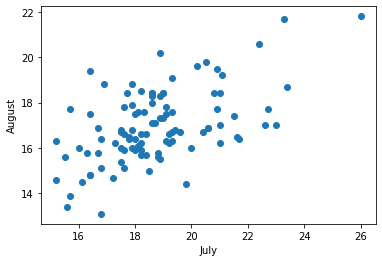

In [ ]:
plt.scatter(x, y)
plt.ylabel('August')
plt.xlabel('July')
plt.show()

In [ ]:
a = np.sum((y - y.mean()) * x)/np.sum((x - x.mean()) * x)
b = y.mean() - a*x.mean()
print('Regression coefficient: %.3f' % a)
print('Intercept: %.3f' % b)

Regression coefficient: 0.441
Intercept: 8.702


Из значения коэффициента регрессии можно сделать вывод о том, что температура в июле часто выше, чем температура в августе. 

## Визуализация линейной регресии и коэффициент детерминации

In [ ]:
y_pred = a * x + b

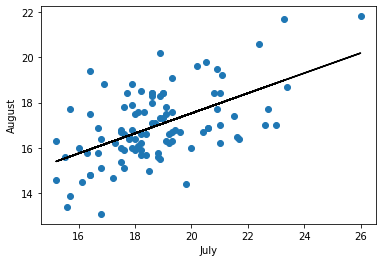

In [ ]:
plt.scatter(x, y)
plt.plot(x, y_pred, color='black')
plt.ylabel('August')
plt.xlabel('July')
plt.show()

In [ ]:
ro = np.sum((y - y.mean())*(x - x.mean()))/len(x)/(x.std() * y.std())
print('Correlation coefficient: %.3f' % ro)
print('Determination coefficient: %.3f' % ro**2)

Correlation coefficient: 0.543
Determination coefficient: 0.295


Коэффициент детерминации на порядок ниже 0.5, то есть эту модель нельзя назвать приемлемой. Принимаемое значение логично в силу того, что данные радномные, то есть температура в августе не зависит от температуры июля. Как видно из графика их значения имеют амплитуду около 10 градусов и разбросаны случайным образом, наблюдается регрессия к среднему.

## Проверка предсказаний на примере и относительная ошибка регрессии

In [ ]:
ix = np.random.choice(np.arange(N), 3, replace=False)
for i in range(len(ix)):
  ix[i] += 1920
x_ix = x[ix]
y_true_ix = y[ix]
y_pred_ix = y_pred[ix]
errors = (y_true_ix - y_pred_ix) / y_true_ix

In [ ]:
pd.DataFrame({'July (x)': x_ix, 'August prediction (y_pred)': y_pred_ix, 'August temperature (y_true)': y_true_ix, 'error': errors}).round(2)

,July (x),August prediction (y_pred),August temperature (y_true),error
year,,,,
1966,19.2,17.18,16.6,-0.03
1934,19.6,17.35,16.7,-0.04
2013,18.9,17.04,18.3,0.07


Предсказание оказывается довольно точным, с небольшим отклонением от целевой переменной.

In [ ]:
err_rel = np.mean(np.abs(y - y_pred)/y) # не накладываем модуль на y так как он в любом случае больше 0
print("Relative error:", err_rel)

Relative error: 0.06447646513858635



Cредняя относительная ошибка составила приблизительно 6.4%, что не очень много. Это может быть связано с тем, что в июле и августе небольшая амплитуда температур (не более 10 градусов), и относительно довольно жаркой температуры данных месяцев отклонение при подсчёте ошибки получается небольшим.

